In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
#Upload dataset
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
#Read the dataset as a pandas dataframe
data = pd.read_excel('gdrive/My Drive/Stock Predicting/Dataset.xlsx')
data.head(5)

,x,y
0,1,8
1,2,21
2,3,50
3,4,101
4,5,180


In [4]:
#Separate X(features) and Y(label), and convert into array
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values.reshape(-1,1)

In [5]:
#Splitting dataset into train and test (80% and 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=41)

In [6]:
#Check the training set size
X_train.shape[1]

1

In [7]:
class PolynomialRegression():
    def __init__(self, degree, epochs, alpha):
        ''' constructor '''
        #Input hyperparameters
        self.degree = degree
        self.epochs = epochs
        self.alpha = alpha
        #Initial values for w and b
        self.w = None
        self.b = 0
        #Features and number of data
        #X_train = dataset number, features
        self.m_train = X_train.shape[0]  #number of dataset
        self.n = X_train.shape[1] #features
        #Varriables for visualization
        self.cost = []
        self.counter = []
    
    def transform(self, X):
      #Create X_transform with m x 1 dimensions (m is number of dataset in the X_train)
      m = X.shape[0]
      X_transform = np.ones((m,1))
      for i in range(0, self.degree+1):
        if i != 0:
          x_pow = np.power(X,i)
          X_transform = np.append(X_transform,x_pow,axis = 1)
          #X_transform will have dimensions of m x (n*degrees+1)
      return X_transform
    
    def normalize(self, X):
      X[:, 1:] = ( X[:, 1:] - np.mean( X[:, 1:], axis = 0 ) ) / np.std( X[:, 1:], axis = 0 )
      return X
        
    def forward_propagation(self,X,w,b):
      #Dimension of X -> m x n
      #w -> 1 x n
      #b and z -> 1 x m
      z = (np.dot(w,X))+b
      return z

    def cost_function(self,z,y):
      #z -> 1 x m
      #y -> 1 x m
      m = y.shape[1]
      J = (1/(2*m))*np.sum(np.square(z-y))
      return J
    
    def back_propagation(self,X,y,z):
      m = y.shape[1]
      #dz -> 1 x m
      dz = (1/m)*(z-y)
      #dw -> 1xm * mx(n*deg+1) = 1x(n*deg+1)
      dw = np.dot(dz,X.T)
      db = np.sum(dz)
      return dw,db
    
    def gradient_descent(self,w,b,dw,db,alpha):
      w = w - self.alpha*dw
      b = b - self.alpha*db
      return w,b
    
    def fit(self, X_train, y_train, X_val, y_val, alpha, epochs):
        ''' function to train the tree '''
        #Store the number of dataset
        m_train = X_train.shape[0]
        #m_val = X_val.shape[0]

        #Store the number of features
        #X_train = m x n
        num_features = X_train.shape[1]
        print(num_features)
        print(m_train)

        #Initialize parameters w and b
        #w -> 1 x (m*deg+1)
        self.w = np.random.randn(1,num_features*degree+1)
        self.b = np.zeros((1,num_features))

        #Transform into polynomial
        #X_train_poly -> n x (m*deg+1)
        X_train_poly = self.transform(X_train)

        #Normalize
        X_train_norm = self.normalize(X_train_poly)

        #Transpose X_train_norm
        #X_train_norm -> (n*deg+1) x m
        X_train_norm = X_train_norm.T
  
        #Transpose y_train
        #Y_train -> 1 x m
        Y_train = y_train.T


        for i in range(1,self.epochs+1):
          #z_train -> (1 x (n*deg+1)) * ((n*deg+1) x m) = 1 x m
          z_train = self.forward_propagation(X_train_norm,self.w,self.b)
          #cost_train -> 1 x m - 1 x m = 1
          cost_train = self.cost_function(z_train,Y_train)
          #dz -> 1 x m
          #dw -> 1xm * mx(n*deg+1) = 1x(n*deg+1)
          dw,db = self.back_propagation(X_train_norm,Y_train,z_train)
          self.w,self.b = self.gradient_descent(self.w,self.b,dw,db,alpha)

          #Performance Evaluation
          #MAE_train = (1/m_train)*np.sum(np.abs(z_train.T-Y_train))
          #rms = mean_squared_error(Y_train, z_train, squared=False)
          #print(rms)

          #For visualization
          self.cost.append(cost_train)
          self.counter.append(i)

          #z_val = self.forward_propagation(X_val,w,b)
          #cost_val = self.cost_function(z_val,y_val)
          #MAE_val = (1/m_val)*np.sum(np.abs(z_val.T-y_val))
          #print(MAE_train)
          #print(MAE_val)

          #print epochs dkk
          print('Epochs '+str(i)+'/'+str(epochs)+': ')
          print('Training Cost '+str(cost_train))
          #print('Root Mean Square Error '+str(rms))

        #Visualization
        plot1 = plt.figure(1)
        plt.scatter( X_train, Y_train, color = 'blue' )
        plt.scatter( X_train, z_train.T, color = 'red' )
        plt.title('Actual vs Predicted')
        plt.show()
        #Visualization Cost Function
        plot2 = plt.figure(2)
        plt.scatter(self.counter, self.cost, color = 'black')
        plt.title('Minimize Cost Funtion')
        plt.show()
        print(self.w.shape)
        print(self.b.shape)
    
    
    def predict(self, X_test, y_test):
        m_test = y_test.shape[1]
        Y_test = y_test
        X_test_poly = self.transform(X_test)
        X_test_norm = self.normalize(X_test_poly)
        X_test_norm = X_test_norm.T
        print(X_test_norm.shape)
        #z = (1 x (n*deg+1)) * ((n*deg+1) x n) = 1 x m
        z_test = self.forward_propagation(X_test_norm,self.w,self.b)
        cost_test = self.cost_function(z_test,Y_test)
        rms = mean_squared_error(Y_test.T, z_test, squared=False)
        print('Root Mean Square Error Value ' +str(rms))
        print('Cost Value '+str(cost_test))
        #Visualization Accuracy
        plt.scatter( X_test, Y_test, color = 'blue' )
        #print(z_train)
        plt.scatter( X_test, z_test, color = 'red' )
        plt.title('Test Set Actual vs Predicted')
        plt.show()
    
    #Yg ini matrix sizenya sudah aman
    #Tinggal Hyperparameter tuning aja

In [8]:
#Features
features = X_train.shape[1]
print(features)

1


In [9]:
#define hyperparameters
alpha = 10e-4
epochs = 1000
degree = 3

1
80
Epochs 1/1000: 
Training Cost 81594869532.63998
Epochs 2/1000: 
Training Cost 81195848602.45653
Epochs 3/1000: 
Training Cost 80798879965.73889
Epochs 4/1000: 
Training Cost 80403952748.51947
Epochs 5/1000: 
Training Cost 80011056135.86003
Epochs 6/1000: 
Training Cost 79620179371.52515
Epochs 7/1000: 
Training Cost 79231311757.6574
Epochs 8/1000: 
Training Cost 78844442654.4543
Epochs 9/1000: 
Training Cost 78459561479.8472
Epochs 10/1000: 
Training Cost 78076657709.18181
Epochs 11/1000: 
Training Cost 77695720874.90076
Epochs 12/1000: 
Training Cost 77316740566.22765
Epochs 13/1000: 
Training Cost 76939706428.85312
Epochs 14/1000: 
Training Cost 76564608164.62247
Epochs 15/1000: 
Training Cost 76191435531.2253
Epochs 16/1000: 
Training Cost 75820178341.8866
Epochs 17/1000: 
Training Cost 75450826465.05984
Epochs 18/1000: 
Training Cost 75083369824.1215
Epochs 19/1000: 
Training Cost 74717798397.06758
Epochs 20/1000: 
Training Cost 74354102216.2117
Epochs 21/1000: 
Training Cost 

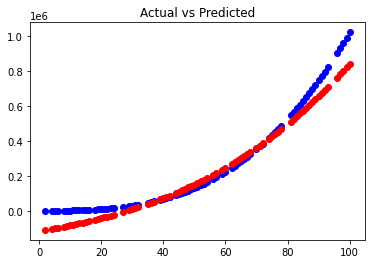

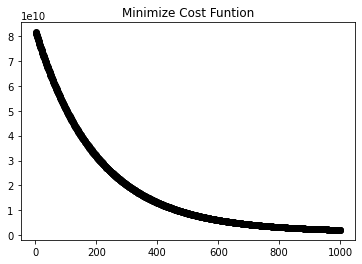

(1, 4)
(1, 1)


In [12]:
regressor = PolynomialRegression(degree,epochs,alpha)
regressor.fit(X_train, y_train, X_test, y_test, alpha, epochs)

(4, 20)
Root Mean Square Error Value 46514.613884484745
Cost Value 30074830509580.01


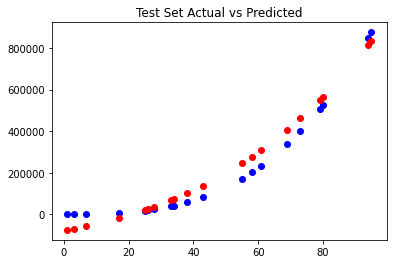

In [13]:
regressor.predict(X_test,y_test)